In [2]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 991.0 kB/s eta 0:00:40
    --------------------------------------- 0.5/38.8 MB 6.3 MB/s eta 0:00:07
   - -------------------------------------- 1.2/38.8 MB 9.6 MB/s eta 0:00:04
   -- ------------------------------------- 2.1/38.8 MB 12.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.3/38.8 MB 15.1 MB/s eta 0:00:03
   ----- ---------------------------------- 5.0/38.8 MB 18.7 MB/s eta 0:00:02
   ------- -------------------------------- 7.2/38.8 MB 23.0 MB/s eta 0:00:02
   ---------- ----------------------------- 10.0/38.8 MB 27.8 MB/s eta 0:00:02
   -------------- ------------------------- 13.9/38.8 MB 59.5 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
image = cv2.imread('Renee.jpg')

In [9]:
# OpenCV загружает изображения в формате BGR, поэтому мы конвертируем его в RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

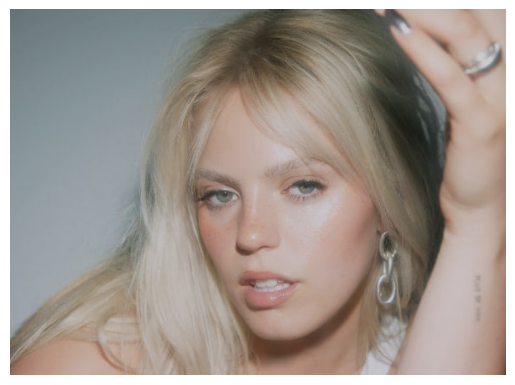

In [10]:
plt.imshow(image_rgb)
plt.axis('off')  # скрыть оси координат
plt.show()

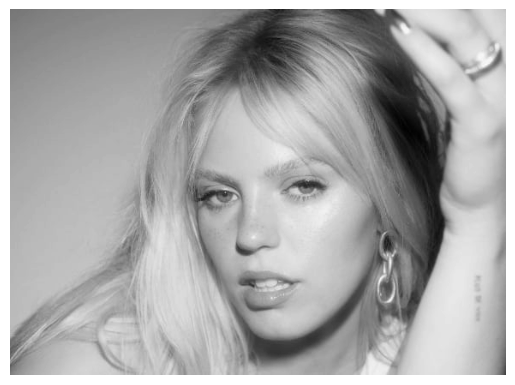

In [11]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

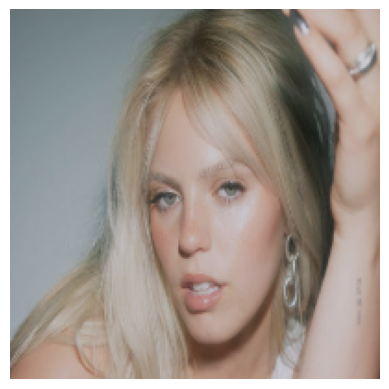

In [12]:
resized_image = cv2.resize(image_rgb, (200, 200))

plt.imshow(resized_image)
plt.axis('off')
plt.show()

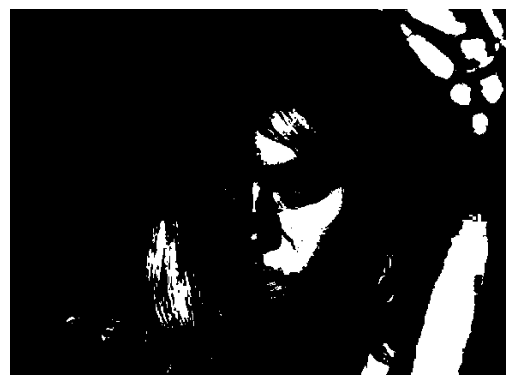

In [13]:
_, thresholded = cv2.threshold(gray_image,180, 255, cv2.THRESH_BINARY)

plt.imshow(thresholded, cmap='gray')
plt.axis('off')
plt.show()

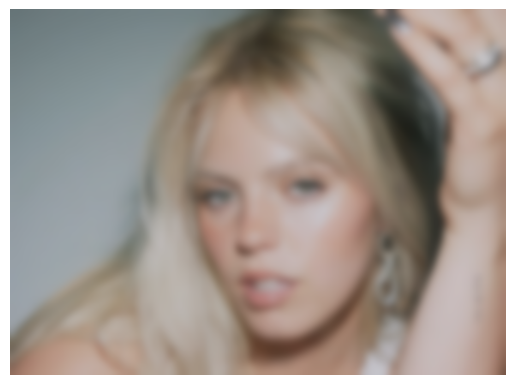

In [ ]:
# Применение размытия
blurred = cv2.GaussianBlur(image_rgb, (27, 27), 0)

plt.imshow(blurred)
plt.axis('off')
plt.show()

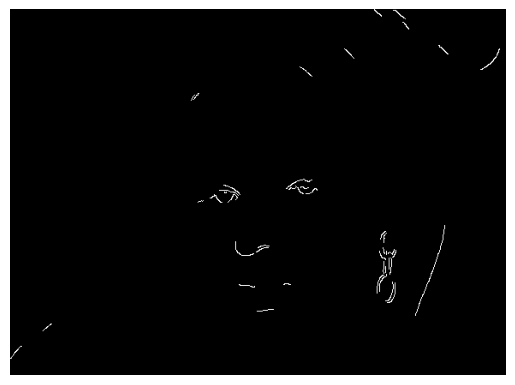

In [ ]:
edges = cv2.Canny(gray_image, 180, 250)

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

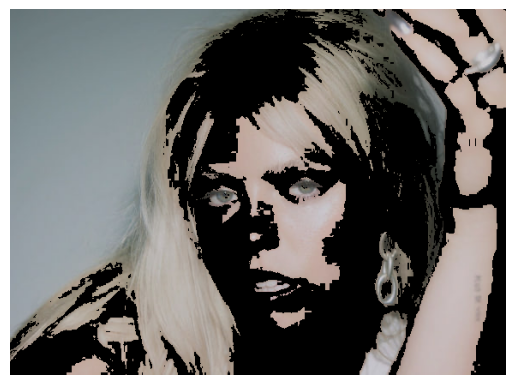

In [ ]:
# Конвертация изображения из RGB в HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Определение диапазона зеленого цвета в HSV
lower_gray = np.array([0, 0, 50])
upper_gray = np.array([180, 50, 255]) # как настроить цвета?

# Создание маски
mask = cv2.inRange(hsv, lower_gray, upper_gray)

# Применение маски к исходному изображению
res = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.imshow(res)
plt.axis('off')
plt.show()

In [ ]:
!ls

Renee.jpg  sample_data


In [ ]:
print(image_rgb)

[[[100 115 118]
  [100 115 118]
  [101 115 118]
  ...
  [186 163 149]
  [186 163 149]
  [185 162 148]]

 [[100 115 118]
  [100 115 118]
  [102 116 119]
  ...
  [187 164 150]
  [187 164 150]
  [186 163 149]]

 [[100 115 118]
  [101 116 119]
  [102 116 119]
  ...
  [189 165 153]
  [188 164 152]
  [187 163 151]]

 ...

 [[143 106  90]
  [145 108  92]
  [148 111  95]
  ...
  [110  81  67]
  [100  74  61]
  [ 92  69  55]]

 [[144 107  91]
  [146 109  93]
  [148 111  95]
  ...
  [109  80  66]
  [100  74  61]
  [ 92  69  55]]

 [[144 107  91]
  [146 109  93]
  [149 112  96]
  ...
  [108  79  65]
  [ 99  73  60]
  [ 91  68  54]]]


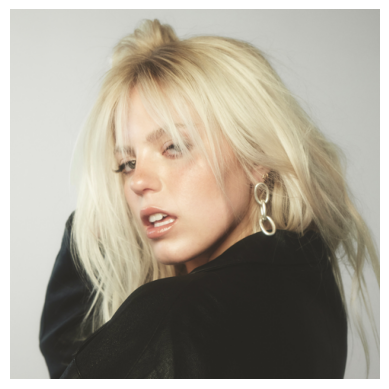

In [ ]:
image = cv2.imread('renee.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
# а для чего это нужно?
# Параметры
k = 15  # число кластеров (можно изменить по желанию)

# Подготовка данных для K-means
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Критерии завершения (тип, макс. число итераций, требуемая точность)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Применение K-means
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Преобразование центров кластеров в целые числа
centers = np.uint8(centers)

# Сопоставление меток пикселей с их цветами в центрах кластеров
segmented_image = centers[labels.flatten()]

# Возвращение изображения к исходной форме
segmented_image = segmented_image.reshape(image_rgb.shape)

In [ ]:
segmented_image.max(), segmented_image.min(), image_rgb.max(),image_rgb.min()

(232, 36, 255, 31)

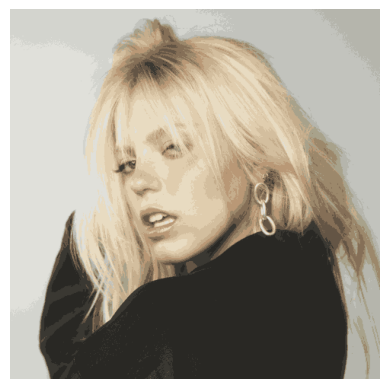

In [ ]:
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

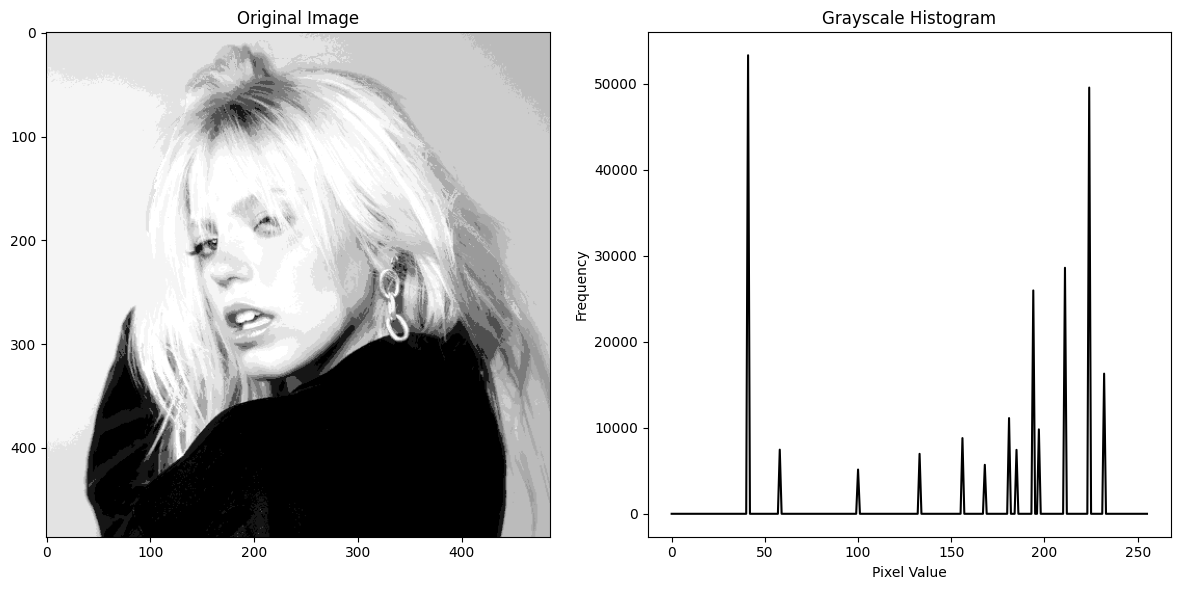

In [ ]:
# Загрузка изображения в оттенках серого
image = cv2.imread('renee.pmg', cv2.IMREAD_GRAYSCALE)

# Вычисление гистограммы
hist = cv2.calcHist([segmented_image[:,:,0]], [0], None, [256], [0,256])

# Отображение изображения и его гистограммы
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(segmented_image[:,:,0], cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Загрузка и отображение исходного изображения
image = cv2.imread('renee.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

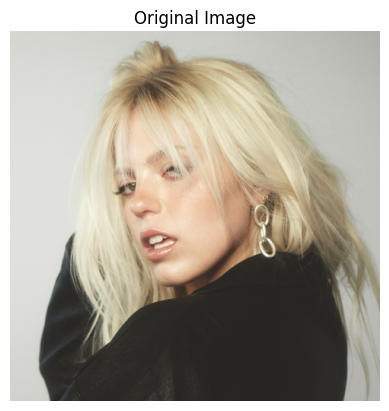

In [ ]:
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [ ]:
# Вращение изображения
def rotate_image(image, angle):
    # Получение размеров изображения
    height, width = image.shape[:2]

    # Определение центра вращения
    center = (width / 2, height / 2)

    # Получение матрицы вращения
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)

    # Применение матрицы вращения
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return rotated_image

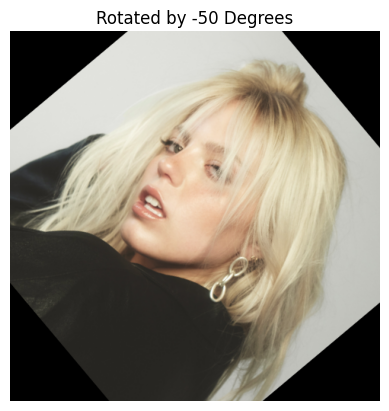

In [ ]:
# Применение функции вращения
angle = -50  # угол вращения в градусах
rotated_img = rotate_image(image_rgb, angle)

plt.imshow(rotated_img)
plt.title(f"Rotated by {angle} Degrees")
plt.axis('off')
plt.show()

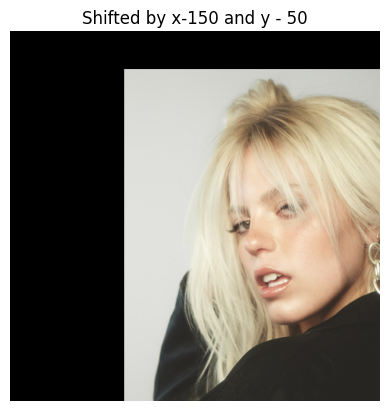

In [ ]:
# Определите величину смещения
shift_x = 150  # смещение вправо
shift_y = 50  # смещение вниз
# Загрузка и отображение исходного изображения
image = cv2.imread('renee.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Создайте матрицу аффинного преобразования
M = np.float32([[1, 0, shift_x],
                [0, 1, shift_y]])

# Примените аффинное преобразование
shifted = cv2.warpAffine(image_rgb, M, (image_rgb.shape[1], image_rgb.shape[0]))

plt.imshow(shifted)
plt.title(f"Shifted by x-{shift_x} and y - {shift_y}")
plt.axis('off')
plt.show()

In [15]:
# Инициализация веб-камеры.
# Аргумент '0' обычно указывает на встроенную веб-камеру.
# Если у вас есть внешняя камера, вы можете использовать '1' или другой номер.
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    print("Ошибка: не удалось открыть камеру.")
else:
    while True:
        # Чтение кадра
        ret, frame = cap.read()

        if not ret:
            print("Ошибка при чтении видео.")
            break

        # Отображение кадра
        cv2.imshow('Video Stream', frame)

        # Если была нажата клавиша 'q', то выход из цикла
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Освобождение ресурсов и закрытие окон
    cap.release()
    cv2.destroyAllWindows()


Ошибка: не удалось открыть камеру.


In [8]:
import cv2
import numpy as np

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    print("Ошибка: не удалось открыть камеру.")
else:
    while True:
        ret, frame = cap.read()

        if not ret:
            print("Ошибка при чтении видео.")
            break

        # Уменьшаем изображение в 2 раза
        frame = cv2.resize(frame, (int(frame.shape[1]/2), int(frame.shape[0]/2)))

        # Цветовой фильтр (здесь будем выделять зеленый цвет, как в предыдущем примере)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_green = np.array([35, 50, 50])
        upper_green = np.array([85, 255, 255])
        mask = cv2.inRange(hsv, lower_green, upper_green)
        color_filtered = cv2.bitwise_and(frame, frame, mask=mask)

        # Фильтр границ (используем Canny детектор границ)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150)
        edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # делаем изображение трехканальным для объединения

        # Объединение изображений
        output = np.hstack((color_filtered, edges_colored, frame))

        cv2.imshow('Video Stream', output)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


Ошибка: не удалось открыть камеру.


In [ ]:
import cv2

index = 0
arr = []
while True:
    cap = cv2.VideoCapture(index)
    if not cap.read()[0]:
        break
    else:
        arr.append(index)
    cap.release()
    index += 1

print(f"Available camera indices: {arr}")


Available camera indices: []


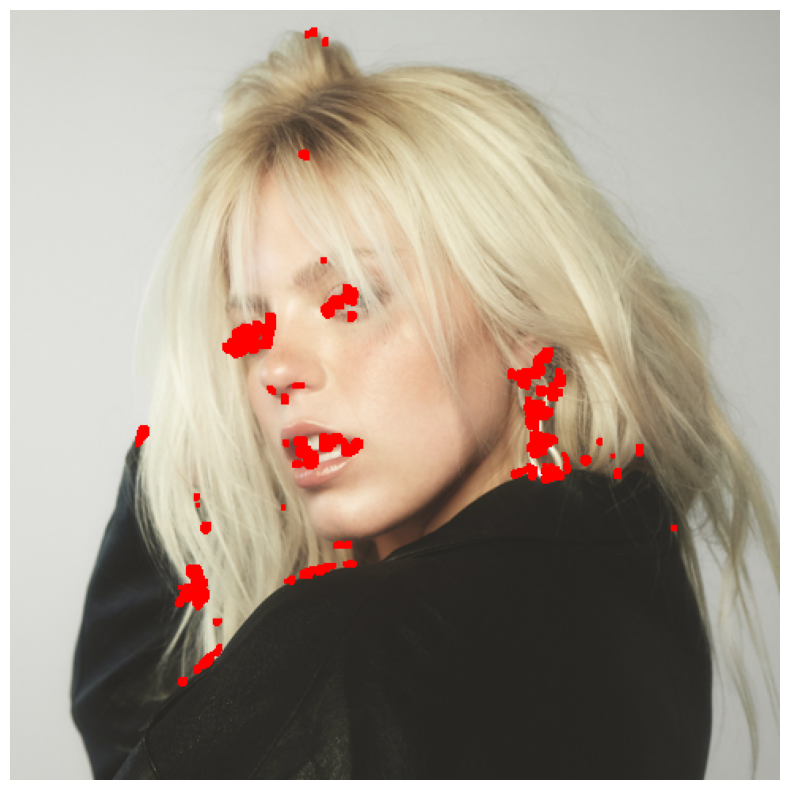

In [ ]:
# Загрузка изображения
image = cv2.imread('renee.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Нахождение углов с помощью метода Харриса
dst = cv2.cornerHarris(src=gray, blockSize=5, ksize=5, k=0.04)

# Расширение результата для визуализации
dst = cv2.dilate(dst, None)

# Наложение отметок на изображении там, где обнаружены углы
threshold = 0.01 * dst.max()
image[dst > threshold] = [0, 0, 255]

# Отображение результата с помощью matplotlib
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Отключаем оси координат
plt.show()


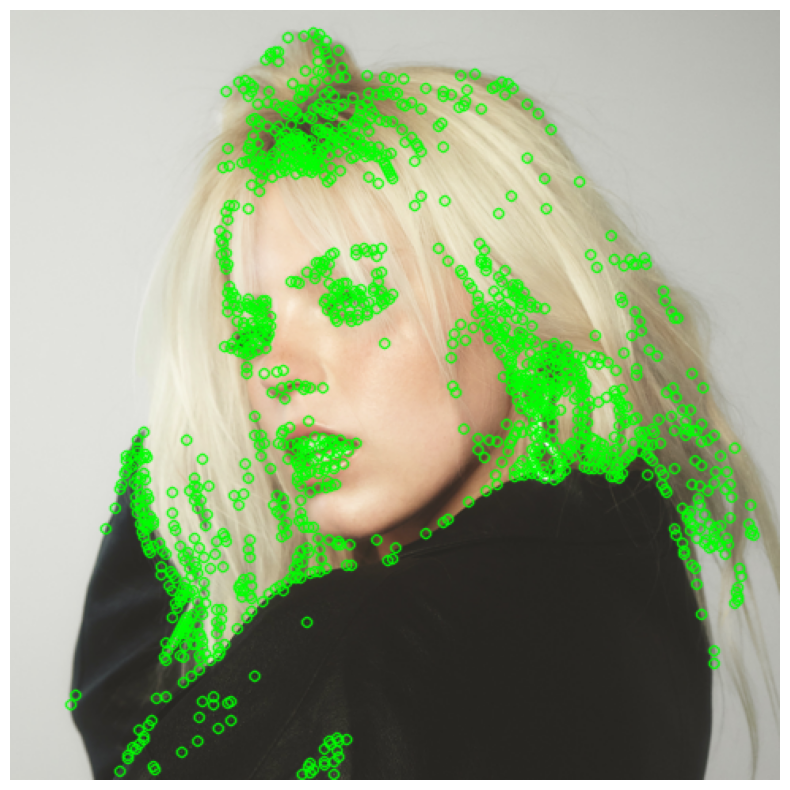

In [ ]:
# Загрузка изображения
image = cv2.imread('renee.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Инициализация FAST детектора углов
fast = cv2.FastFeatureDetector_create()

# Нахождение и отображение углов
keypoints = fast.detect(gray, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

# Отображение результата с помощью matplotlib
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Отключаем оси координат
plt.show()


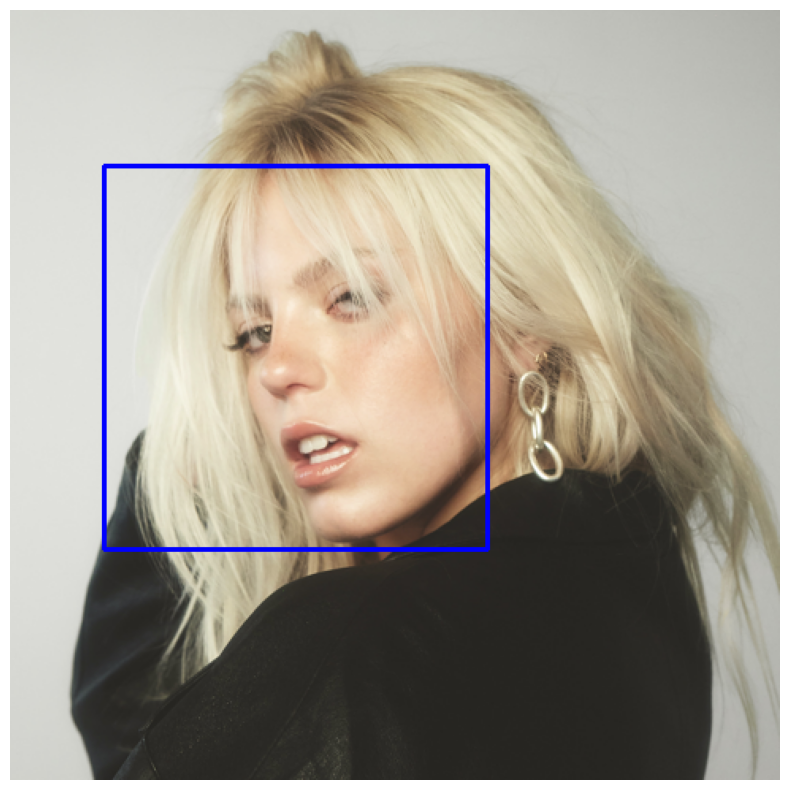

In [ ]:
# Загрузка изображения
image = cv2.imread('renee.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Применение размытия
# image = cv2.GaussianBlur(image, (151, 151), 150)

# Загрузка предварительно обученного каскада Хаара для детектирования лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Детектирование лиц на изображении
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Рисуем прямоугольники вокруг обнаруженных лиц
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Отображение результата с помощью matplotlib
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Отключаем оси координат
plt.show()


In [1]:
# Инициализация видеопотока с веб-камеры (обычно веб-камера имеет индекс 0)
cap = cv2.VideoCapture(0)

# Проверка, инициализирован ли видеопоток корректно
if not cap.isOpened():
    print("Ошибка: не удалось открыть камеру!")
    exit()

# Загрузка предварительно обученного каскада Хаара для детектирования лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    # Захват кадра из видеопотока
    ret, frame = cap.read()
    if not ret:
        break

    # Конвертация кадра в оттенки серого
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Детектирование лиц на кадре
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Рисуем прямоугольники вокруг обнаруженных лиц
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Отображение обработанного кадра
    cv2.imshow('Face Detection', frame)

    # Для выхода из цикла нажмите клавишу 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Освобождение ресурсов и закрытие окон
cap.release()
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined

In [ ]:
def find_matches(image_path, template_path, threshold=0.8):
    # Загрузка изображения и шаблона
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

    # Получение ширины и высоты шаблона
    w, h = template.shape[::-1]

    # Применение метода совпадения шаблонов
    res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

    # Получение координат, где совпадение превышает пороговое значение
    loc = np.where(res >= threshold)

    for pt in zip(*loc[::-1]):
        cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

    # Отображение результата в Jupyter Notebook
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Пример использования:
# find_matches('path_to_your_image.jpg', 'path_to_your_template.jpg')

In [ ]:
# Загрузка изображения
template = cv2.imread('renee.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

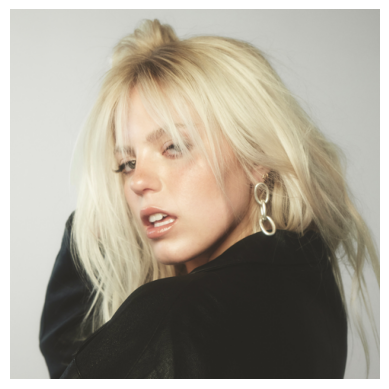

In [ ]:
    # Отображение результата в Jupyter Notebook
plt.imshow(template, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
image = cv2.imread('Renee.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

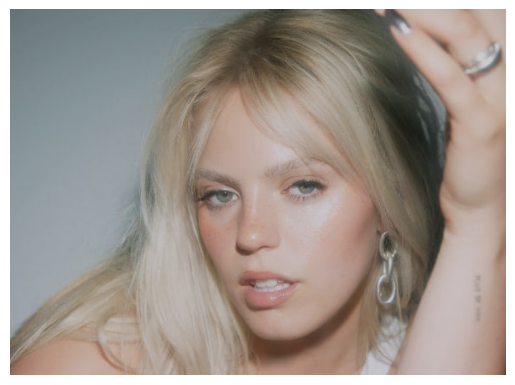

In [ ]:
    # Отображение результата в Jupyter Notebook
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Пример использования:
find_matches('Renee.jpg', 'renee.png')

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/templmatch.cpp:1175: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'matchTemplate'


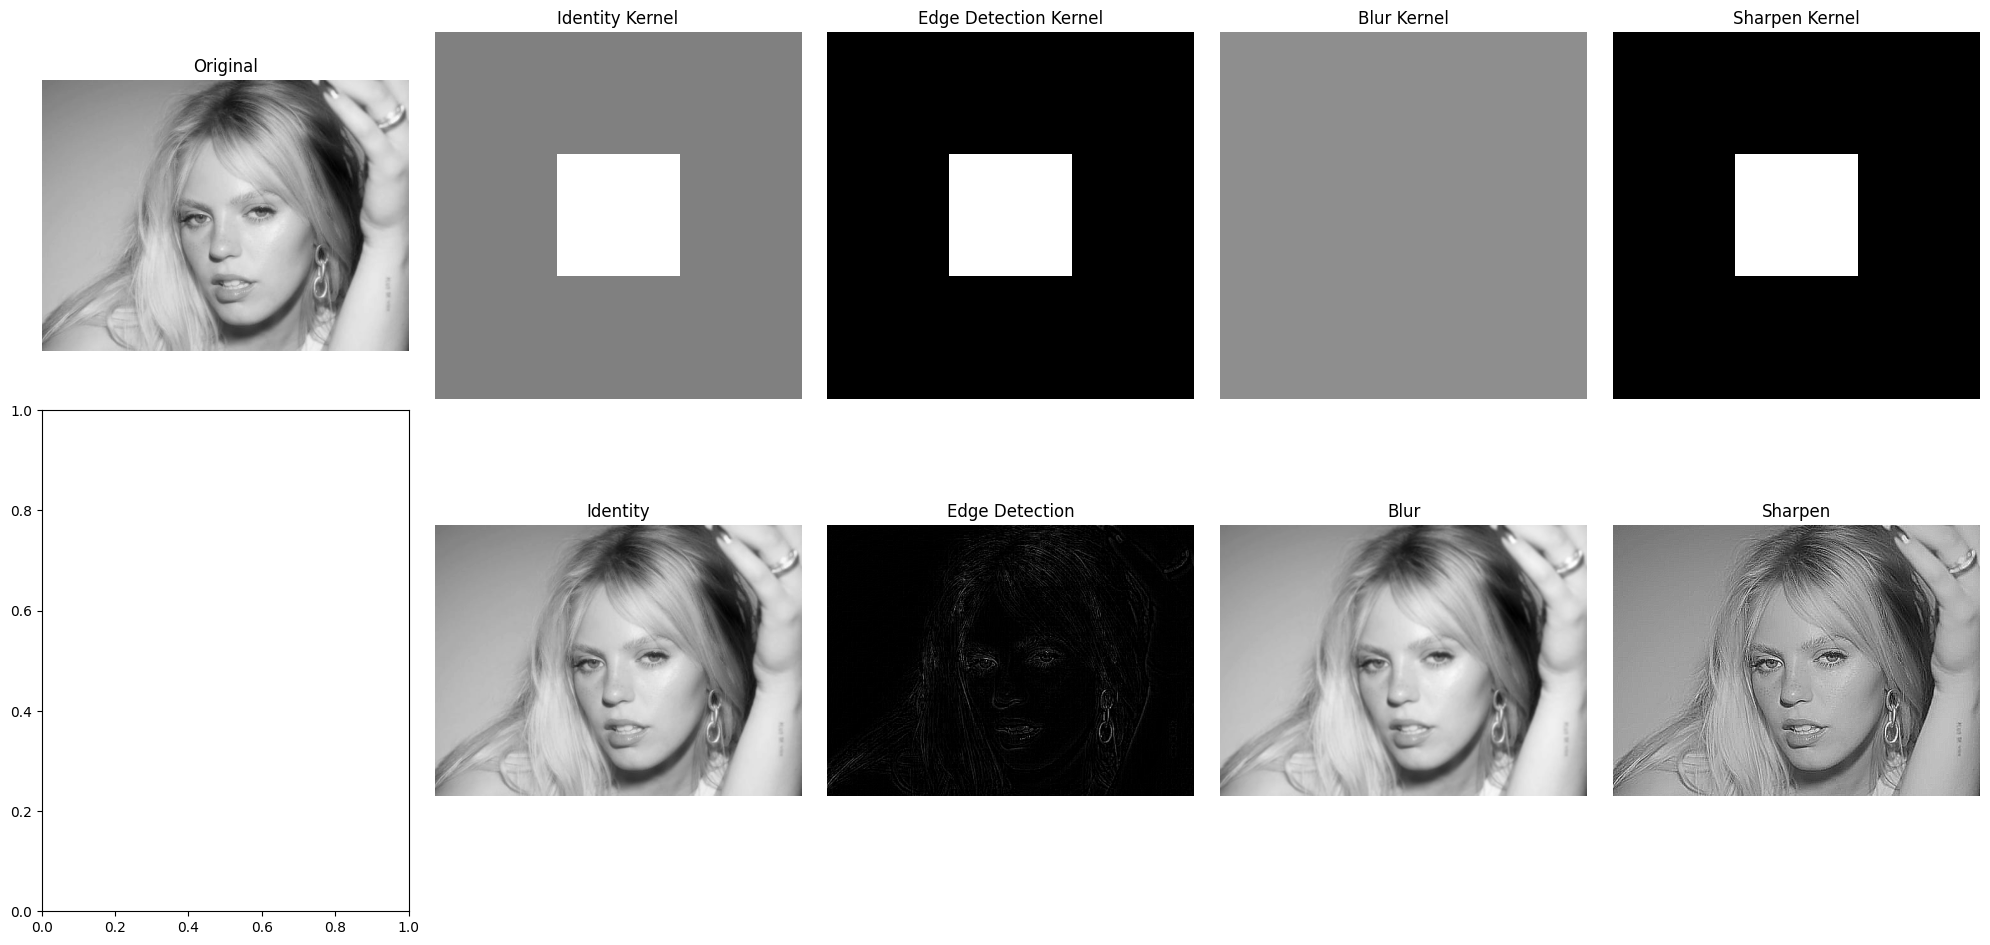

In [ ]:
# Загрузка изображения
image_path = "Renee.jpg" # Замените на путь к вашему изображению
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Различные ядра
identity_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

edge_detection_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

blur_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9

sharpen_kernel = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

kernels = [identity_kernel, edge_detection_kernel, blur_kernel, sharpen_kernel]
kernel_names = ["Identity", "Edge Detection", "Blur", "Sharpen"]

# Отображение изображений
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

# Оригинальное изображение
axs[0, 0].imshow(image, cmap="gray")
axs[0, 0].set_title("Original")
axs[0, 0].axis('off')

# Применение ядер и отображение
for idx, kernel in enumerate(kernels):
    processed_image = cv2.filter2D(image, -1, kernel)
    axs[1, idx+1].imshow(processed_image, cmap="gray")
    axs[1, idx+1].set_title(kernel_names[idx])
    axs[1, idx+1].axis('off')

    # Отображение ядра
    axs[0, idx + 1].imshow(kernel, cmap="gray", vmin=-1, vmax=1)
    axs[0, idx + 1].set_title(kernel_names[idx] + " Kernel")
    axs[0, idx + 1].axis('off')

plt.tight_layout()
plt.show()
